## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.regularizers import l1, l2, l1_l2
def build_mlp(input_shape, L, output_units=10, num_neurons=[512, 256, 128], l_ratio=1e-4):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0: #fist layer (input layer)
            if L == l1:
                x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1(l_ratio))(input_layer)
            elif L == l1_l2:
                x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1_l2(l_ratio))(input_layer)
                    
            else:
                x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l2(l_ratio))(input_layer)
                
        else: #Hidden layers
            if L == l1:
                x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1),
                                 kernel_regularizer=l1(l_ratio))(x)
            elif L == l1_l2:
                x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1),
                                 kernel_regularizer=l1_l2(l_ratio))(x)
            else:
                x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1),
                                 kernel_regularizer=l2(l_ratio))(x)
                
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L_EXP = 1e-4
L1L2 = [l1, l2, l1_l2] 

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
regulizer_ratio = L_EXP
for regulizer_type in L1L2:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], L = regulizer_type)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-l-%s" % str(regulizer_type)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with Regulizer = 0.000100
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [====

50000/50000 [==============================] - 10s 195us/step - loss: 2.7131 - accuracy: 0.6229 - val_loss: 3.1203 - val_accuracy: 0.4957
Epoch 49/50
50000/50000 [==============================] - 10s 193us/step - loss: 2.6827 - accuracy: 0.6240 - val_loss: 3.0229 - val_accuracy: 0.5041
Epoch 50/50
50000/50000 [==============================] - 10s 199us/step - loss: 2.6420 - accuracy: 0.6270 - val_loss: 2.8976 - val_accuracy: 0.5336
Experiment with Regulizer = 0.000100
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
______________________________________________

50000/50000 [==============================] - 10s 210us/step - loss: 1.0740 - accuracy: 0.6730 - val_loss: 1.4879 - val_accuracy: 0.5366
Epoch 46/50
50000/50000 [==============================] - 9s 188us/step - loss: 1.0617 - accuracy: 0.6795 - val_loss: 1.5753 - val_accuracy: 0.5158
Epoch 47/50
50000/50000 [==============================] - 10s 193us/step - loss: 1.0490 - accuracy: 0.6809 - val_loss: 1.5097 - val_accuracy: 0.5374
Epoch 48/50
50000/50000 [==============================] - 10s 190us/step - loss: 1.0334 - accuracy: 0.6862 - val_loss: 1.6335 - val_accuracy: 0.5097
Epoch 49/50
50000/50000 [==============================] - 9s 190us/step - loss: 1.0297 - accuracy: 0.6889 - val_loss: 1.5572 - val_accuracy: 0.5252
Epoch 50/50
50000/50000 [==============================] - 10s 193us/step - loss: 1.0191 - accuracy: 0.6909 - val_loss: 1.5192 - val_accuracy: 0.5336
Experiment with Regulizer = 0.000100
Model: "model_1"
____________________________________________________________

50000/50000 [==============================] - 14s 277us/step - loss: 1.7760 - accuracy: 0.4734 - val_loss: 1.7991 - val_accuracy: 0.4618
Epoch 43/50
50000/50000 [==============================] - 15s 294us/step - loss: 1.7740 - accuracy: 0.4737 - val_loss: 1.7931 - val_accuracy: 0.4701
Epoch 44/50
50000/50000 [==============================] - 16s 319us/step - loss: 1.7687 - accuracy: 0.4758 - val_loss: 1.7916 - val_accuracy: 0.4721
Epoch 45/50
50000/50000 [==============================] - 16s 311us/step - loss: 1.7635 - accuracy: 0.4769 - val_loss: 1.7893 - val_accuracy: 0.4671
Epoch 46/50
50000/50000 [==============================] - 15s 296us/step - loss: 1.7612 - accuracy: 0.4778 - val_loss: 1.7898 - val_accuracy: 0.4640
Epoch 47/50
50000/50000 [==============================] - 17s 336us/step - loss: 1.7581 - accuracy: 0.4765 - val_loss: 1.7880 - val_accuracy: 0.4645
Epoch 48/50
50000/50000 [==============================] - 15s 292us/step - loss: 1.7533 - accuracy: 0.4786 - va

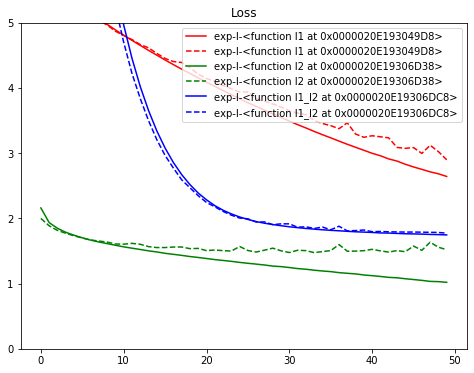

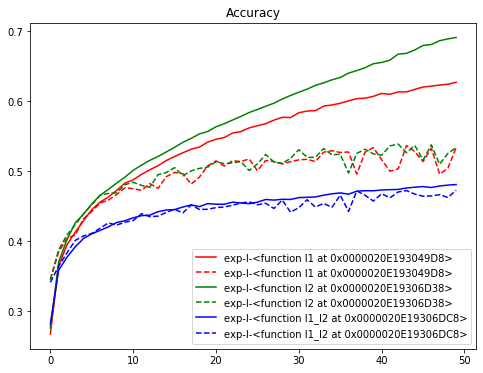

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()